In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/ALFA-group/rmdl.git

  Cloning https://github.com/ALFA-group/rmdl.git to /tmp/pip-req-build-r_mpi7aj
  Running command git clone --filter=blob:none --quiet https://github.com/ALFA-group/rmdl.git /tmp/pip-req-build-r_mpi7aj
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/ALFA-group/rmdl.git /tmp/pip-req-build-r_mpi7aj did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/ALFA-group/rmdl.git /tmp/pip-req-build-r_mpi7aj did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [5]:
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [6]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [7]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [8]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

In [9]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

In [10]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [11]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove

--2024-03-02 15:41:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-02 15:41:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-02 15:41:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

gl

In [12]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [13]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [14]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(training_reviews)
sequences = tokenizer.texts_to_sequences(training_reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10849 unique tokens.
Shape of data tensor: (16930, 1000)
Shape of label tensor: (16930, 2)


In [15]:
training_reviews[:10]

[' we booked to stay in a deluxe room but was persuaded to upgrade to an executive room and charged  more which had not been explained fully we thought the total additional amount was  and not  per night the piece of paper we were given stated best possible available room and did not confirm it was an executive i am not sure i would have paid the extra  as the room was not as good as the deluxe room that had been pictured when i booked with bookings com and it had no hotel literature or information in the room the carpet was also not too clean ',
 ' the breakfast was exceptional even though we also had to pay  each extra for it i had seen it advertised within the hotel website as breakfast free after we had agreed to pay the location was extremely good for getting out and about on the tube the hotel itself was nice and had plenty of public seating areas to relax in a pleasant bar with good parking space underneath it although it was quite expensive at  a night ',
 ' a little out of the

In [16]:
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

# Remove any rows from the training_reviews array that do not have a corresponding label in the labels array
training_reviews = [review for review, label in zip(training_reviews, labels) if label is not None]
labels = [label for review, label in zip(training_reviews, labels) if label is not None]

# Create the sentiment_df dataframe
dict1 = {
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

# Print the shape of the data and label tensors
print('Shape of data tensor:', data.shape)
# Convert the list to a NumPy array
labels = np.array(labels)

# Print the shape of the label tensor
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (16930, 1000)
Shape of label tensor: (16930,)


In [17]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [18]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)


In [19]:
# 5. Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [20]:
word_embeddings = {}
with open('/content/drive/My Drive/Dataset/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        word_embeddings[word] = vector

In [21]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


In [22]:
vocabSize = len(word_index) + 1
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(training_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

10850

In [23]:
EMBEDDING_DIM = 100
MAX_NUM_WORDS = 500
embedding_matrix = np.zeros((vocabSize, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

(10850, 100)


In [24]:
# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
print(num_words)
embedding_matrix = np.zeros((vocabSize, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

500
(10850, 100)


In [25]:
print(labels)

[0 1 0 ... 1 0 0]


In [26]:
# 8. Shuffle the dataset
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import nltk
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabSize, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         1085000   
                                                                 
 conv1d (Conv1D)             (None, 996, 128)          64128     
                                                                 
 bidirectional (Bidirection  (None, 64)                41216     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 2)                 50        
                                                                 
Total params: 1191954 (4.55 MB)
Trainable params: 106954 (417.79 KB)
Non-trainable params: 1085000 (4.14 MB)
_____________

In [29]:
from keras.callbacks import EarlyStopping

In [30]:
# Alternate approach: Create input and output data

X = cleaned_positive_reviews + cleaned_negative_reviews
y = [1] * len(cleaned_positive_reviews) + [0] * len(cleaned_negative_reviews)

In [31]:
# Tokenize the text
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)


In [32]:
# Pad sequences
maxlen = 100
X_padded = pad_sequences(X_seq, maxlen=maxlen)

In [33]:
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
# Shuffle the data
X_shuffled, y_shuffled = shuffle(X_padded, y)

In [35]:
# Split the data into training and test set (70:30) ratio
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=42)

In [36]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 100, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [37]:
# Convert label lists to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/5
22564/22564 [==============================] - 366s 16ms/step - loss: 0.1547 - accuracy: 0.9442 - val_loss: 0.1399 - val_accuracy: 0.9477
Epoch 2/5
22564/22564 [==============================] - 350s 16ms/step - loss: 0.1353 - accuracy: 0.9518 - val_loss: 0.1352 - val_accuracy: 0.9528
Epoch 3/5
22564/22564 [==============================] - 374s 17ms/step - loss: 0.1312 - accuracy: 0.9532 - val_loss: 0.1389 - val_accuracy: 0.9512
Epoch 4/5
22564/22564 [==============================] - 392s 17ms/step - loss: 0.1273 - accuracy: 0.9548 - val_loss: 0.1332 - val_accuracy: 0.9525
Epoch 5/5
9671/9671 [==============================] - 19s 2ms/step - loss: 0.1327 - accuracy: 0.9530
Test Accuracy: 0.9529541730880737


In [42]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

9671/9671 [==============================] - 23s 2ms/step - loss: 0.1327 - accuracy: 0.9530
Test Accuracy: 0.9529541730880737
Test Loss: 0.1326737105846405


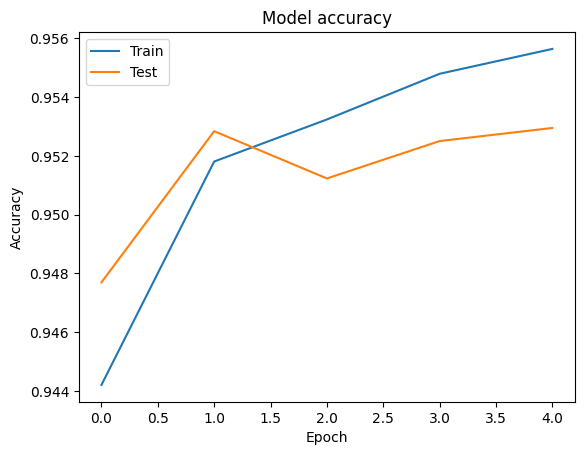

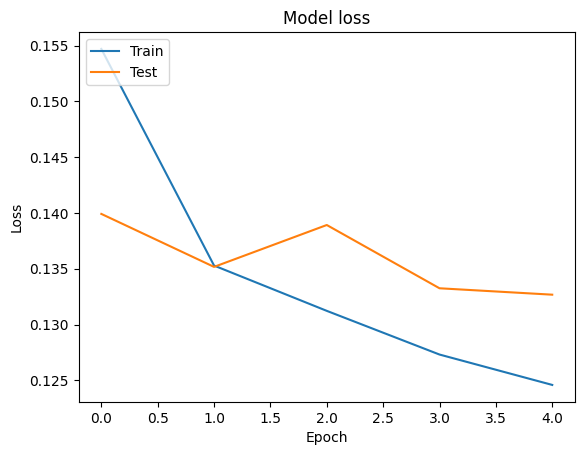

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix

9671/9671 [==============================] - 25s 3ms/step


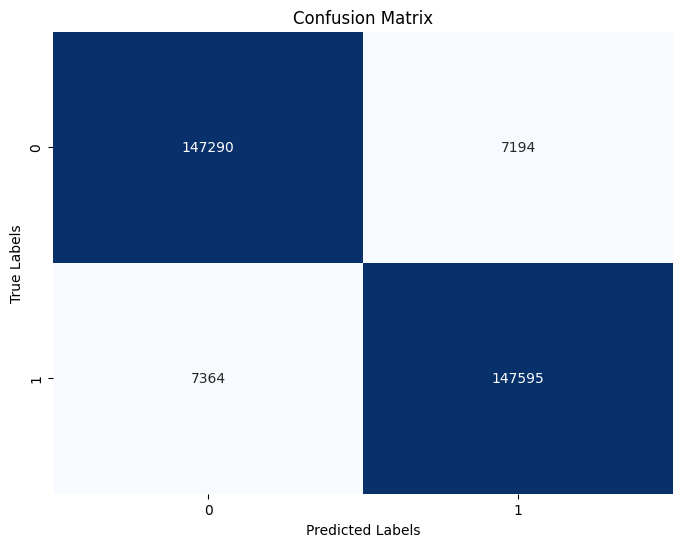

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [46]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95    154484
           1       0.95      0.95      0.95    154959

    accuracy                           0.95    309443
   macro avg       0.95      0.95      0.95    309443
weighted avg       0.95      0.95      0.95    309443



In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9529541789602608
Precision: 0.9535238292126702
Recall: 0.9524777521796088
F1-score: 0.9530005036352132


Matthews Correlation Coefficient (MCC): 0.9059088417386074


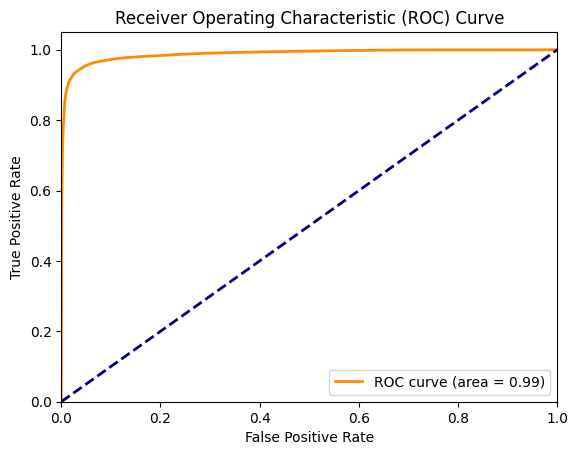

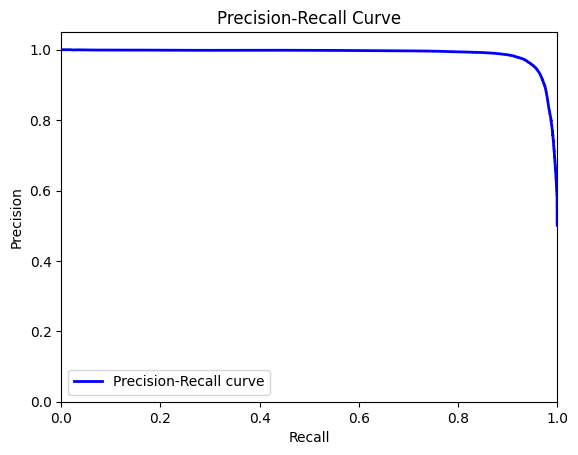

In [48]:
from sklearn.metrics import matthews_corrcoef, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()




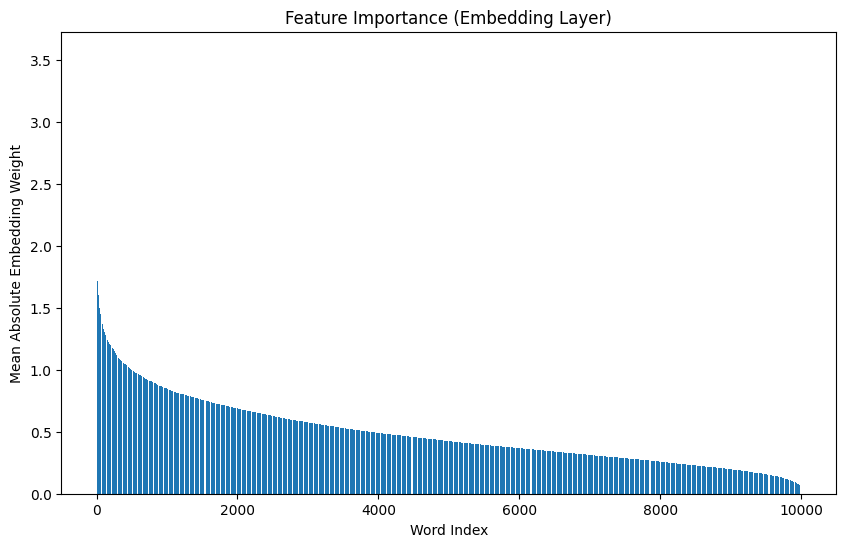

In [50]:
# Assuming model is a trained neural network model with an embedding layer
embedding_layer = model.layers[0]  # Assuming the embedding layer is the first layer

if isinstance(embedding_layer, tf.keras.layers.Embedding):
    embedding_weights = embedding_layer.get_weights()[0]
    feature_importance = np.mean(np.abs(embedding_weights), axis=1)  # Compute mean absolute value across embedding dimensions
    sorted_idx = np.argsort(feature_importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
    plt.xlabel('Word Index')
    plt.ylabel('Mean Absolute Embedding Weight')
    plt.title('Feature Importance (Embedding Layer)')
    plt.show()
else:
    print("The model's first layer is not an Embedding layer.")
